In [53]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("../data/Bakery sales.csv")

# Borrar todas las filas donde la columna 'article' no tenga más de 2 caracteres
df = df[df['article'].str.len() > 2]

# Mostrar las primeras filas del DataFrame resultante
print(df.head())

   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  


In [54]:
# Calcular la demanda valorizada = Quantity * unit_price
"""
   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  

"""
df_abc = df.copy()

df_abc["DemandaValorizada"] = df["Quantity"] * df["unit_price"].str.replace(" €", "").str.replace(",", ".").astype(float)

# ordenar el DataFrame por la nueva columna, de forma descendente
ddf_abcf = df_abc.sort_values(by="DemandaValorizada", ascending=False)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_abc.head())

print(df_abc.info())

   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  DemandaValorizada  
0       1.0     0,90 €               0.90  
1       3.0     1,20 €               3.60  
2       2.0     1,20 €               2.40  
3       1.0     1,15 €               1.15  
4       5.0     1,20 €               6.00  
<class 'pandas.core.frame.DataFrame'>
Index: 234000 entries, 0 to 234004
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         234000 non-null  int64  
 1   date               234000 non-null  obje

In [55]:
# Agrupar los prudctos por artículo y sumar la demanda valorizada
df_agrupado = df_abc.groupby("article")["DemandaValorizada"].sum().reset_index()
df_agrupado = df_agrupado.sort_values(by="DemandaValorizada", ascending=False)

print(df_agrupado.head())


                  article  DemandaValorizada
139  TRADITIONAL BAGUETTE          144756.05
56       FORMULE SANDWICH           34710.50
31              CROISSANT           33579.50
84       PAIN AU CHOCOLAT           31100.45
6                 BANETTE           24555.15


In [56]:
# Calcular la demanda valorizada porcentual
total = df_agrupado["DemandaValorizada"].sum()
df_agrupado["DemandaValorizadaPorcentual"] = df_agrupado["DemandaValorizada"] / total * 100

print(df_agrupado.head())

                  article  DemandaValorizada  DemandaValorizadaPorcentual
139  TRADITIONAL BAGUETTE          144756.05                    25.912185
56       FORMULE SANDWICH           34710.50                     6.213384
31              CROISSANT           33579.50                     6.010928
84       PAIN AU CHOCOLAT           31100.45                     5.567164
6                 BANETTE           24555.15                     4.395516


In [57]:
# Calcular la demanda valorizada porcentual acumulada respecto a la demanda valorizada
df_agrupado["DemandaValorizadaPorcentualAcumulada"] = df_agrupado["DemandaValorizadaPorcentual"].cumsum()

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_agrupado.head())

                  article  DemandaValorizada  DemandaValorizadaPorcentual  \
139  TRADITIONAL BAGUETTE          144756.05                    25.912185   
56       FORMULE SANDWICH           34710.50                     6.213384   
31              CROISSANT           33579.50                     6.010928   
84       PAIN AU CHOCOLAT           31100.45                     5.567164   
6                 BANETTE           24555.15                     4.395516   

     DemandaValorizadaPorcentualAcumulada  
139                             25.912185  
56                              32.125569  
31                              38.136497  
84                              43.703660  
6                               48.099177  


In [58]:
# Asignar el tipo A, B, C según la demanda valorizada porcentual acumulada
def asignar_tipo(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

df_agrupado["Tipo"] = df_agrupado["DemandaValorizadaPorcentualAcumulada"].apply(asignar_tipo)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_agrupado.head())

# guardar
df_agrupado.to_csv("../results/Bakery sales pre-pivot-ABC.csv", index=False)

                  article  DemandaValorizada  DemandaValorizadaPorcentual  \
139  TRADITIONAL BAGUETTE          144756.05                    25.912185   
56       FORMULE SANDWICH           34710.50                     6.213384   
31              CROISSANT           33579.50                     6.010928   
84       PAIN AU CHOCOLAT           31100.45                     5.567164   
6                 BANETTE           24555.15                     4.395516   

     DemandaValorizadaPorcentualAcumulada Tipo  
139                             25.912185    A  
56                              32.125569    A  
31                              38.136497    A  
84                              43.703660    A  
6                               48.099177    A  


In [59]:
# Analisis XYZ
# Calcular la columna "month" como "2021-01" es decir "año-mes"
# Erroneamente habiamos tomado mes como mes del año "01", "02", etc. lo que causaba problemas al faltar los ultimos 3 meses en 2022
df["year-month"] = df["date"].str[:7]

# guardar
df.to_csv("../results/Bakery sales pre-pivot-XYZ.csv", index=False)

# Para cada articulo calcular la demanda total (no valorizada) por mes
df_agrupado_mes = df.groupby(["article", "year-month"])["Quantity"].sum().reset_index()

# calculado manualmente con quantity > 1
assert df_agrupado_mes[(df_agrupado_mes["article"] == "TROPEZIENNE") & (df_agrupado_mes["year-month"] == "2022-01")]["Quantity"].values[0] == 5

print(df_agrupado_mes.head())



       article year-month  Quantity
0   12 MACARON    2022-07      14.0
1   12 MACARON    2022-08      47.0
2   12 MACARON    2022-09       9.0
3   ARMORICAIN    2022-07       3.0
4  ARTICLE 295    2021-11       1.0


In [60]:
# Rellenar los meses que faltan a cada articulo con 0
df_agrupado_mes = df_agrupado_mes.set_index(["article", "year-month"]).unstack().fillna(0).stack().reset_index()

print(df_agrupado_mes.head())


      article year-month  Quantity
0  12 MACARON    2021-01       0.0
1  12 MACARON    2021-02       0.0
2  12 MACARON    2021-03       0.0
3  12 MACARON    2021-04       0.0
4  12 MACARON    2021-05       0.0


/tmp/ipykernel_3861/4156508429.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_agrupado_mes = df_agrupado_mes.set_index(["article", "year-month"]).unstack().fillna(0).stack().reset_index()


In [61]:
# Pivotar el DataFrame para tener los meses como columnas
df_pivot = df_agrupado_mes.pivot(index="article", columns="year-month", values="Quantity").reset_index()

meses = df["year-month"].unique()

print(df_pivot.head())

print(meses)

year-month         article  2021-01  2021-02  2021-03  2021-04  2021-05  \
0               12 MACARON      0.0      0.0      0.0      0.0      0.0   
1               ARMORICAIN      0.0      0.0      0.0      0.0      0.0   
2              ARTICLE 295      0.0      0.0      0.0      0.0      0.0   
3                 BAGUETTE    741.0    774.0    891.0    988.0   1120.0   
4           BAGUETTE APERO      1.0      3.0      3.0      4.0      0.0   

year-month  2021-06  2021-07  2021-08  2021-09  ...  2021-12  2022-01  \
0               0.0      0.0      0.0      0.0  ...      0.0      0.0   
1               0.0      0.0      0.0      0.0  ...      0.0      0.0   
2               0.0      0.0      0.0      0.0  ...      0.0      0.0   
3            1036.0   1596.0   1966.0   1083.0  ...    755.0    617.0   
4               3.0      2.0      3.0      6.0  ...      5.0      4.0   

year-month  2022-02  2022-03  2022-04  2022-05  2022-06  2022-07  2022-08  \
0               0.0      0.0     

In [62]:
# Calcula el promedio de la demanda por articulo, la desviacion estandar y cuanto representa en %
# len(meses)+1 ya que comienza en 01 (i=1) y termina en 12 (i=13)
df_pivot["mean"] = df_pivot.iloc[:, 1:len(meses)+1].mean(axis=1)

df_pivot["std"] = df_pivot.iloc[:, 1:len(meses)+1].std(axis=1)

df_pivot["std%"] = df_pivot["std"] * 100 / df_pivot["mean"]

print(df_pivot)

year-month                article  2021-01  2021-02  2021-03  2021-04  \
0                      12 MACARON      0.0      0.0      0.0      0.0   
1                      ARMORICAIN      0.0      0.0      0.0      0.0   
2                     ARTICLE 295      0.0      0.0      0.0      0.0   
3                        BAGUETTE    741.0    774.0    891.0    988.0   
4                  BAGUETTE APERO      1.0      3.0      3.0      4.0   
..                            ...      ...      ...      ...      ...   
143                   TROPEZIENNE      0.0      0.0     12.0     10.0   
144         TROPEZIENNE FRAMBOISE      0.0      0.0     13.0     15.0   
145                        TULIPE      0.0      0.0      0.0      0.0   
146                     VIENNOISE      0.0      0.0      0.0      0.0   
147                     VIK BREAD     96.0     85.0    118.0    152.0   

year-month  2021-05  2021-06  2021-07  2021-08  2021-09  ...  2022-03  \
0               0.0      0.0      0.0      0.0    

In [63]:
# quitar los que su promedio sea menor a 1
df_pivot = df_pivot[df_pivot["mean"] > 1]

In [64]:
# simla: Asignar XYZ =SI(H3<=10%;"X";SI(H3<=25%;"Y";SI(H3>=25%;"Z")))
X = 10
Y = 25

# Un poco mas razonable al ajustar por temporadas sería que clase Y <= 50%?
#X = 10
#Y = 50

def asignar_xyz(valor):
    if valor <= X:
        return 'X'
    elif valor <= Y:
        return 'Y'
    else:
        return 'Z'
    
df_pivot["XYZ"] = df_pivot["std%"].apply(asignar_xyz)

# ordernar por desviacion estandar
df_pivot = df_pivot.sort_values(by="std%", ascending=True)

print(df_pivot.head())

# guardar
df_pivot.to_csv("../results/Bakery sales XYZ.csv", index=False)

year-month           article  2021-01  2021-02  2021-03  2021-04  2021-05  \
7                  BANETTINE    113.0    120.0    139.0    149.0    141.0   
83                      PAIN     89.0     90.0    116.0    129.0    111.0   
20               CAFE OU EAU     67.0     63.0     85.0    107.0    105.0   
122         SANDWICH COMPLET     70.0     88.0    149.0    160.0    134.0   
28                   COMPLET    103.0    127.0    164.0    191.0    189.0   

year-month  2021-06  2021-07  2021-08  2021-09  ...  2022-04  2022-05  \
7             148.0    158.0    174.0    145.0  ...    156.0    155.0   
83            117.0    129.0    117.0    112.0  ...    118.0    121.0   
20             96.0    124.0    133.0     86.0  ...     81.0     99.0   
122           191.0    143.0    178.0    189.0  ...    152.0    182.0   
28            198.0    232.0    264.0    145.0  ...    184.0    182.0   

year-month  2022-06  2022-07  2022-08  2022-09        mean        std  \
7             150.0    22

In [65]:
# contar cuantos articulos hay de cada tipo
df_xyz = df_pivot["XYZ"].value_counts().reset_index()

print(df_xyz)

  XYZ  count
0   Z    107
1   Y      3


In [66]:
# Crear la tabla final: articulo, tipo ABC, tipo XYZ
df_final = pd.merge(df_agrupado, df_pivot[["article", "XYZ"]], on="article")

# eliminar columnas no necesarias
df_final = df_final.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada"])

# ordernar por A y luego por XYZ
df_final = df_final.sort_values(by=["Tipo", "XYZ"])

print(df_final)

# guardar
df_final.to_csv("../results/Bakery sales final.csv", index=False)


                    article Tipo XYZ
0      TRADITIONAL BAGUETTE    A   Z
1          FORMULE SANDWICH    A   Z
2                 CROISSANT    A   Z
3          PAIN AU CHOCOLAT    A   Z
4                   BANETTE    A   Z
..                      ...  ...  ..
105             PAIN DE MIE    C   Z
106              BRIOCHETTE    C   Z
107   TROPEZIENNE FRAMBOISE    C   Z
108                MERINGUE    C   Z
109  ECLAIR FRAISE PISTACHE    C   Z

[110 rows x 3 columns]


In [67]:
# Graficar las series de tiempo de los productos de la clase A
# agrupar por dia (si hay muchos 0 estamos complicados y se hace por semana para esos)
# calcular la nueva columna "day" y "week"
df["day"] = pd.to_datetime(df["date"]).dt.dayofyear
df["week"] = pd.to_datetime(df["date"]).dt.isocalendar().week

# calcular la demanda total por dia
df_agrupado_dia = df.groupby(["article", "day"])["Quantity"].sum().reset_index()


# filtrar los productos de la clase A, columa Tipo de df_agrupado
df_clase_A = df_agrupado[df_agrupado["Tipo"] == "A"]

# unir los productos de la clase A con la demanda por dia
df_clase_A_dia = pd.merge(df_clase_A, df_agrupado_dia, on="article")

# quitar columnas innecesarias
df_clase_A_dia = df_clase_A_dia.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada", "Tipo"])

print(df_clase_A_dia.head())

"""
                article day  Quantity
0  TRADITIONAL BAGUETTE  01    3355.0
1  TRADITIONAL BAGUETTE  02    3501.0
2  TRADITIONAL BAGUETTE  03    3700.0
3  TRADITIONAL BAGUETTE  04    3797.0
4  TRADITIONAL BAGUETTE  05    3824.0
"""

# pivotear el DataFrame
df_clase_A_dia_pivot = df_clase_A_dia.pivot(index="article", columns="day", values="Quantity").reset_index()

# rellenar los valores faltantes con 0
df_clase_A_dia_pivot = df_clase_A_dia_pivot.fillna(0)

print(df_clase_A_dia_pivot.head())

# guardar
df_clase_A_dia_pivot.to_csv("../results/Bakery sales class A by day.csv", index=False)



                article  day  Quantity
0  TRADITIONAL BAGUETTE    2     402.0
1  TRADITIONAL BAGUETTE    3     298.0
2  TRADITIONAL BAGUETTE    4     155.0
3  TRADITIONAL BAGUETTE    5      99.0
4  TRADITIONAL BAGUETTE    6      78.0
day     article      2     3     4     5     6     7     8     9    10  ...  \
0      BAGUETTE  101.0  50.0  31.0  29.0  23.0  42.0  37.0  52.0  59.0  ...   
1       BANETTE  107.0  49.0  26.0  26.0  23.0  39.0  40.0  63.0  53.0  ...   
2    BOULE 400G   23.0  16.0   8.0   6.0   4.0   9.0  11.0  14.0   8.0  ...   
3       BRIOCHE    5.0   4.0   1.0   2.0   2.0   1.0   5.0   4.0   2.0  ...   
4      CAMPAGNE   21.0  11.0   7.0   3.0   5.0   4.0   5.0   6.0   6.0  ...   

day   356   357   358   359   360   361   362   363   364   365  
0    18.0  29.0  36.0  32.0  32.0  36.0  41.0  35.0  29.0  49.0  
1    30.0  25.0  42.0  30.0  34.0  33.0  43.0  30.0  26.0  41.0  
2     3.0   3.0  19.0  12.0  42.0   6.0   5.0   3.0   2.0  15.0  
3     2.0   3.0   2.0   2.0

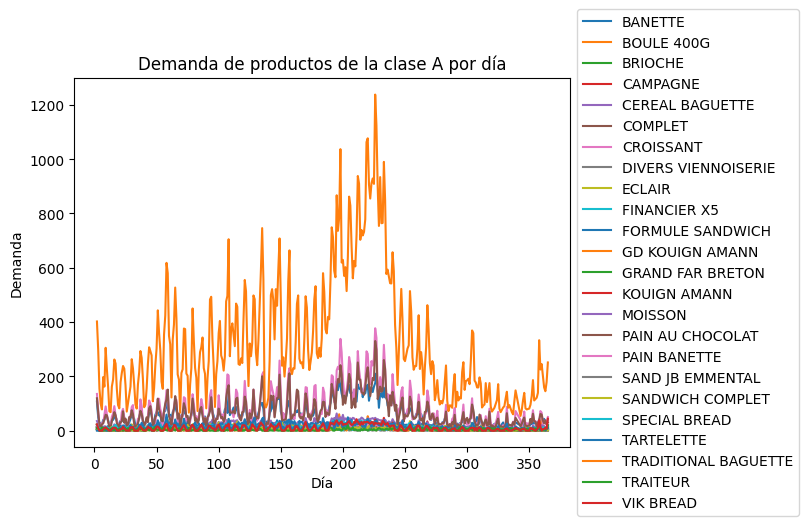

<Figure size 640x480 with 0 Axes>

In [68]:
# Graficar las series de tiempo de los productos de la clase A

import matplotlib.pyplot as plt

# graficar las series de tiempo
for i in range(1, len(df_clase_A_dia_pivot)):
    plt.plot(df_clase_A_dia_pivot.columns[1:], df_clase_A_dia_pivot.iloc[i, 1:], label=df_clase_A_dia_pivot.iloc[i, 0])

plt.xlabel("Día")
plt.ylabel("Demanda")
plt.title("Demanda de productos de la clase A por día")
plt.legend()

# el grafico se ve mal, porque los label de los productos ocupan mucho espacio
# ocultar los label de los productos (lineas)
plt.legend().set_visible(False)
# y poner una leyenda aparte
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

# guardar el grafico como imagen
plt.savefig("../results/Bakery sales class A by day.png")

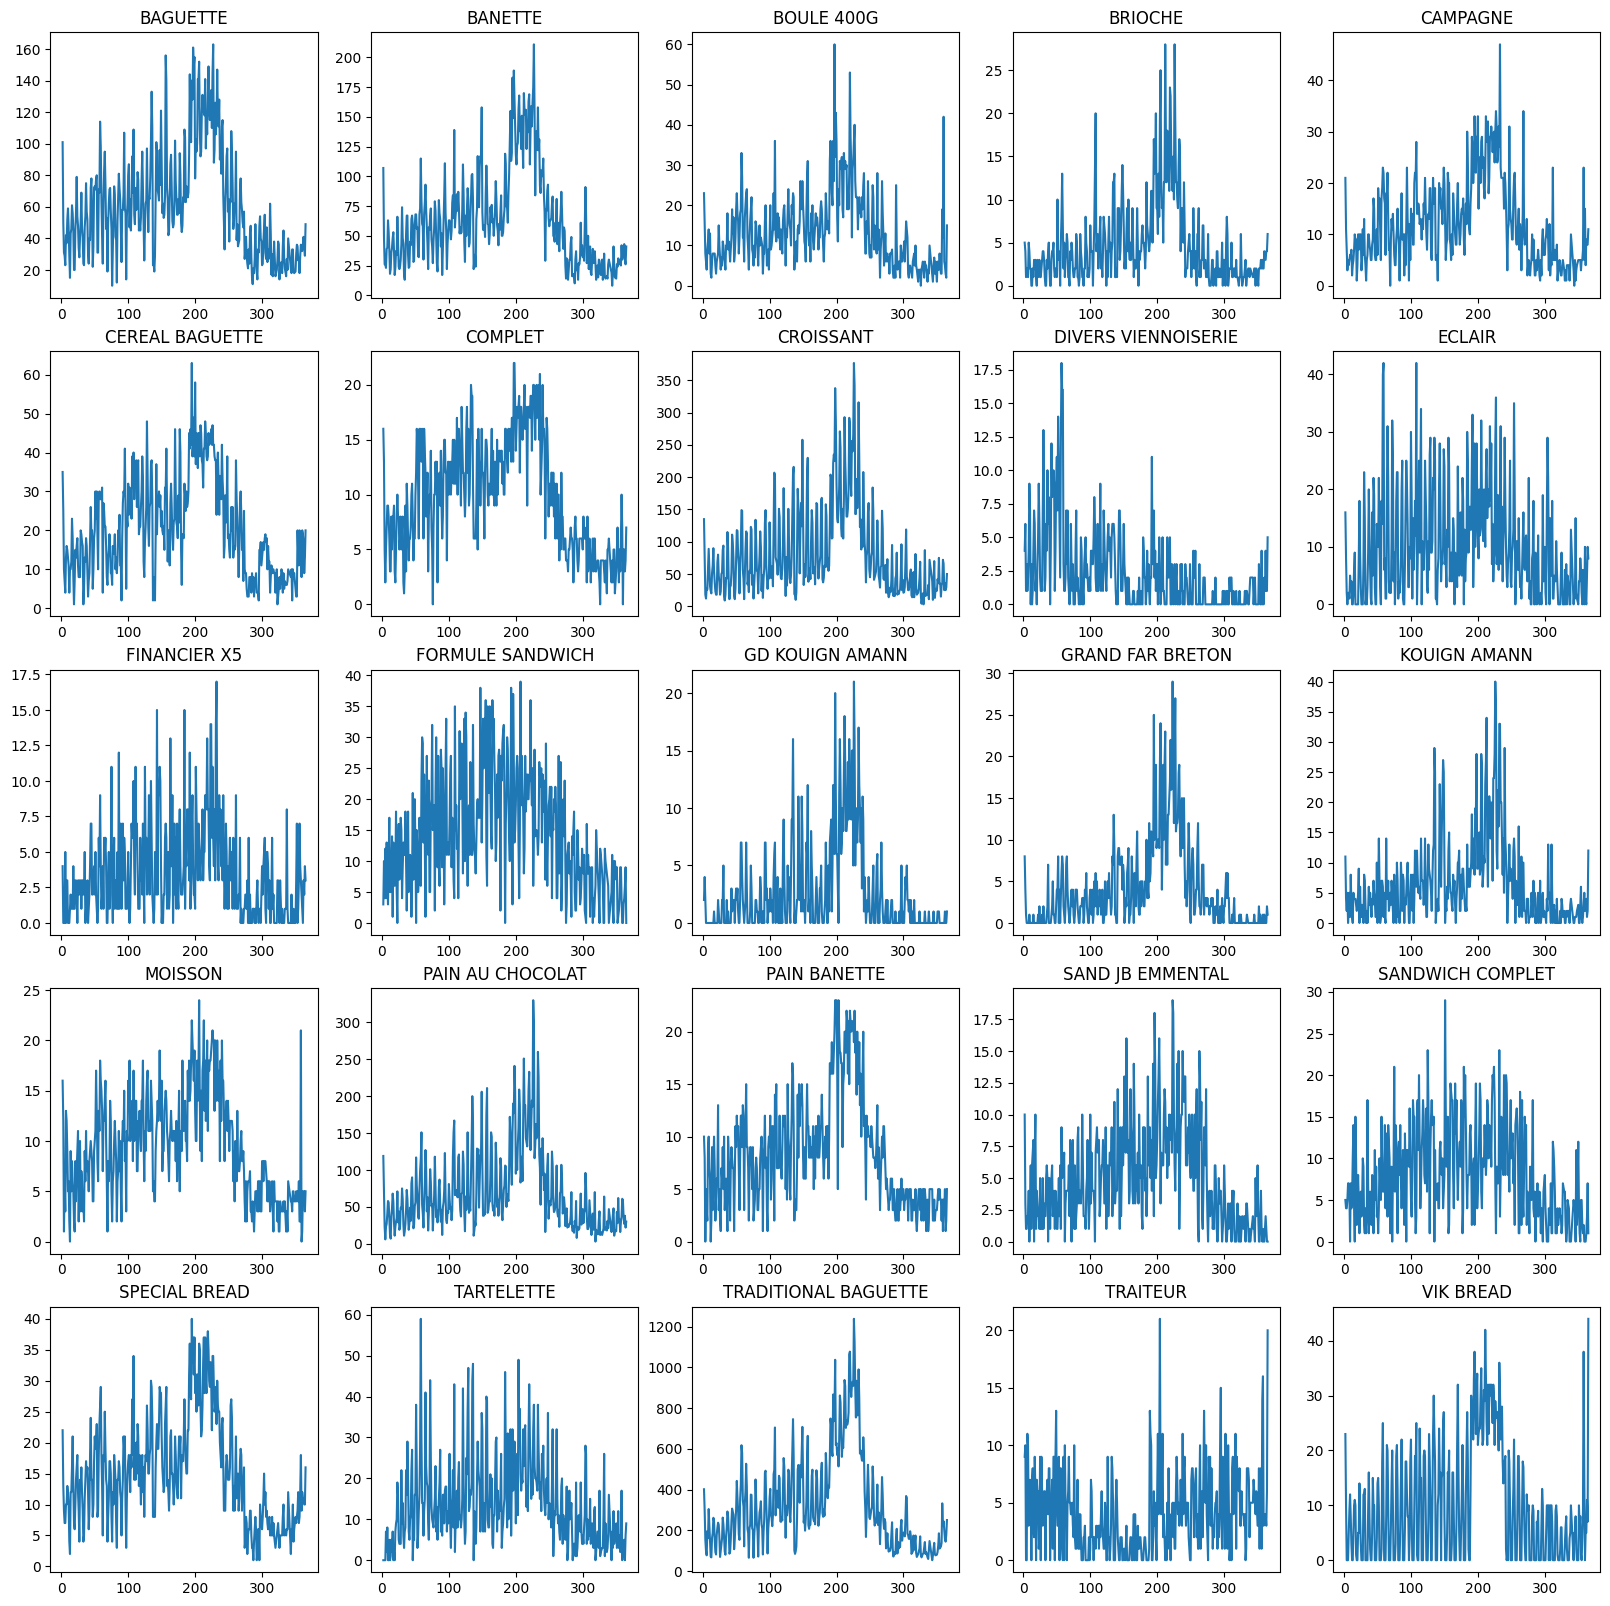

In [69]:
# Mismo grafico pero para cada uno de los productos y en un mismo grafico como subplots
total_articulos = len(df_clase_A_dia_pivot)
fig, axs = plt.subplots(total_articulos // 5, 5, figsize=(20, 20))

for i in range(0, len(df_clase_A_dia_pivot)):
    ax = axs[i // 5, i % 5]
    ax.plot(df_clase_A_dia_pivot.columns[1:], df_clase_A_dia_pivot.iloc[i, 1:], label=df_clase_A_dia_pivot.iloc[i, 0])
    ax.set_title(df_clase_A_dia_pivot.iloc[i, 0])

plt.show()


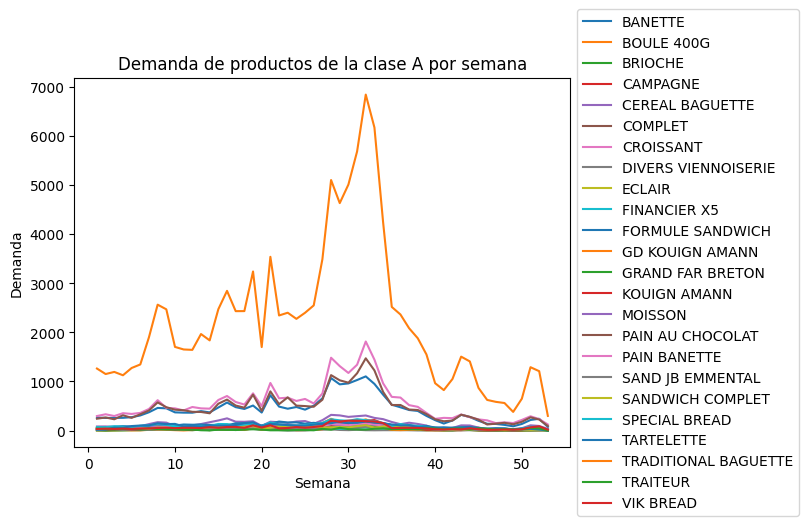

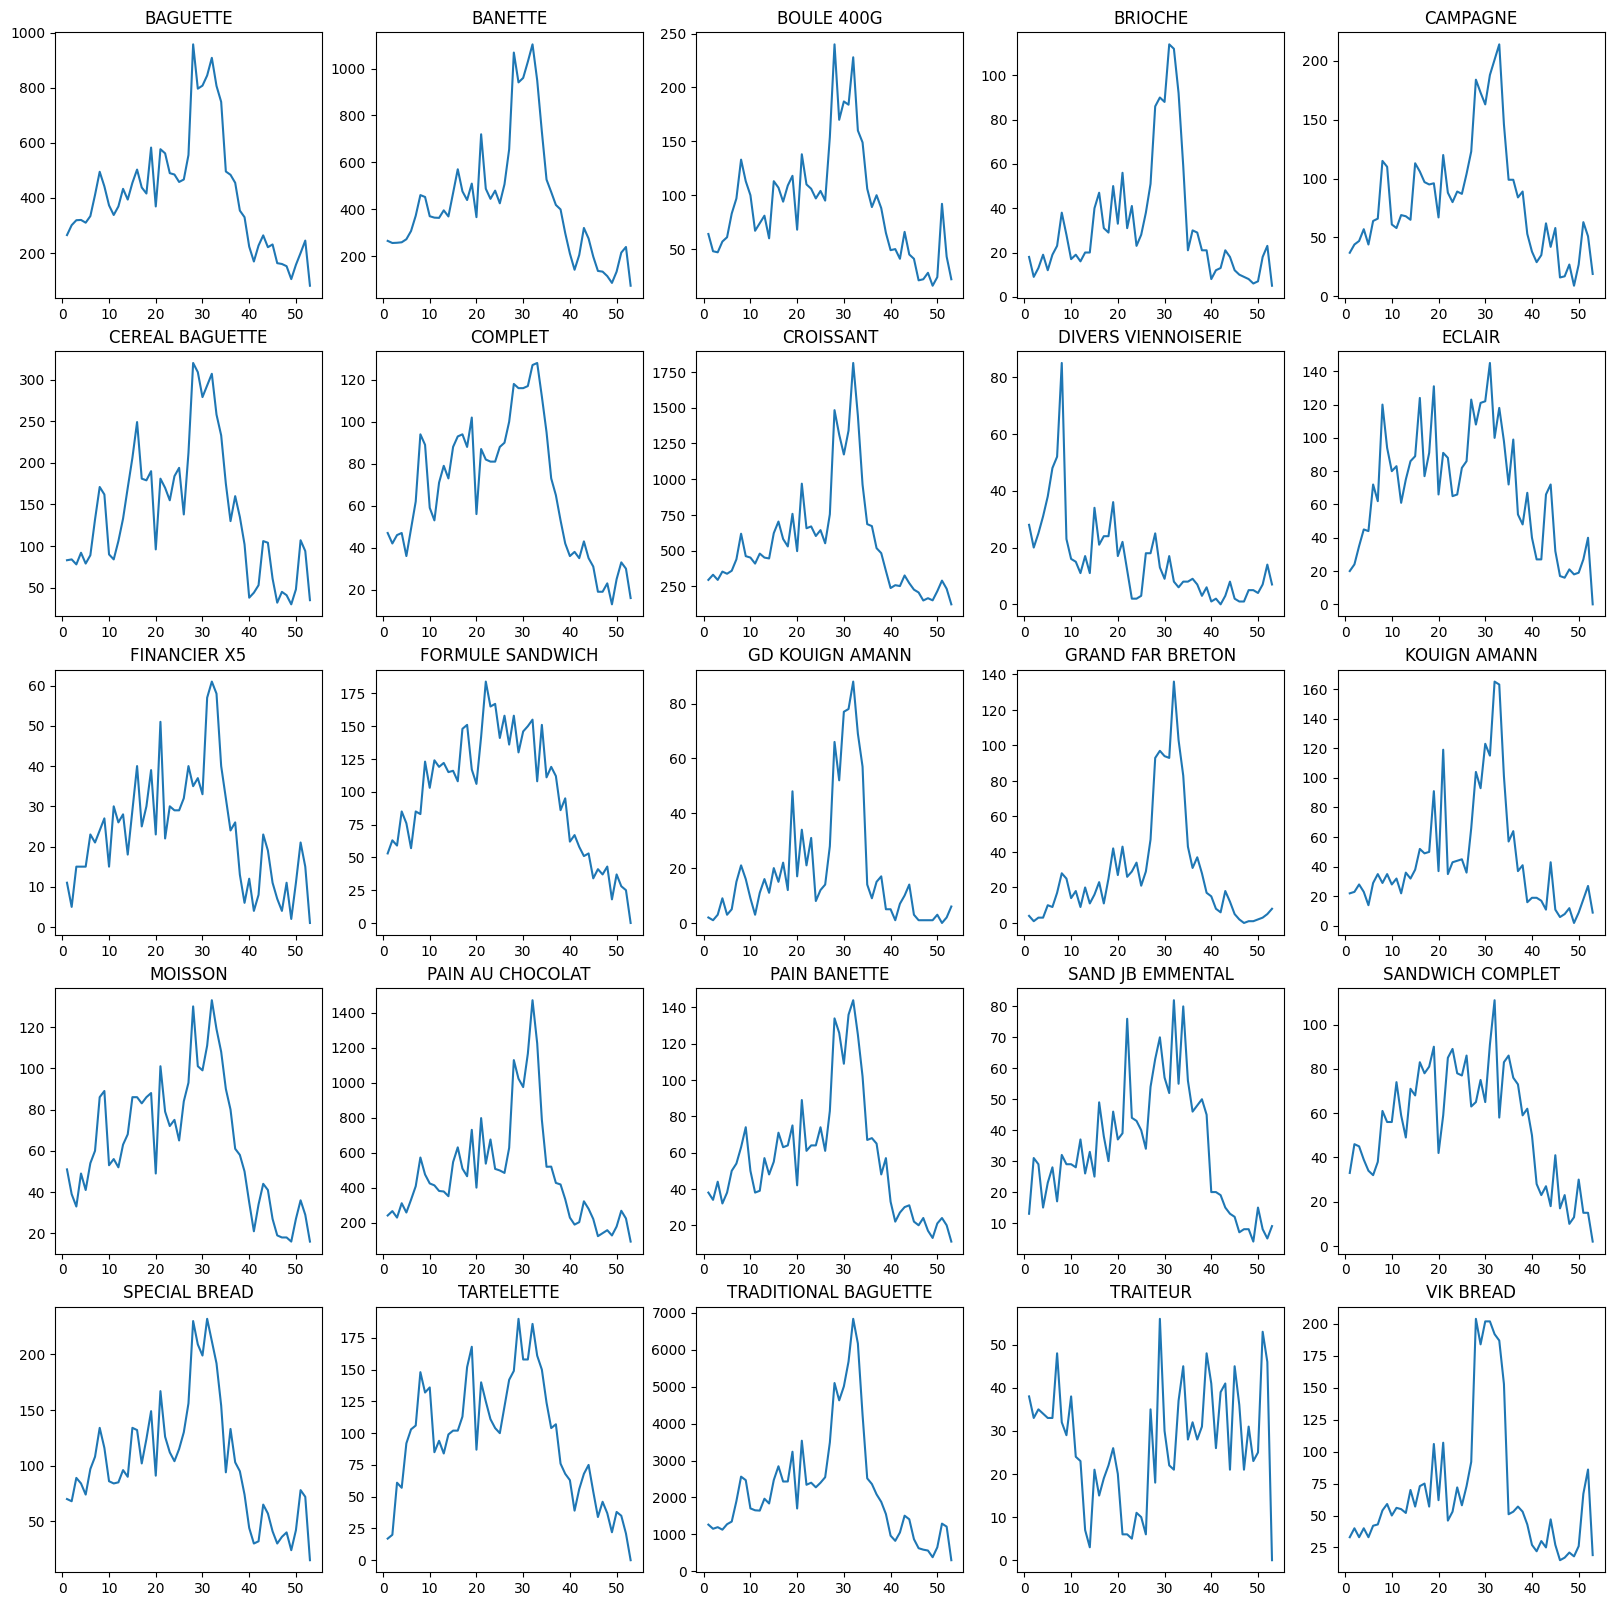

In [70]:
# lo mismo por semana
df_agrupado_semana = df.groupby(["article", "week"])["Quantity"].sum().reset_index()

df_clase_A_semana = pd.merge(df_clase_A, df_agrupado_semana, on="article")

df_clase_A_semana = df_clase_A_semana.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada", "Tipo"])

df_clase_A_semana_pivot = df_clase_A_semana.pivot(index="article", columns="week", values="Quantity").reset_index()

df_clase_A_semana_pivot = df_clase_A_semana_pivot.fillna(0)

df_clase_A_semana_pivot.to_csv("../results/Bakery sales class A by week.csv", index=False)

# graficar las series de tiempo
for i in range(1, len(df_clase_A_semana_pivot)):
    plt.plot(df_clase_A_semana_pivot.columns[1:], df_clase_A_semana_pivot.iloc[i, 1:], label=df_clase_A_semana_pivot.iloc[i, 0])

plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.title("Demanda de productos de la clase A por semana")
plt.legend().set_visible(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# Mismo grafico pero para cada uno de los productos y mostrarlo en un mismo grafico como subplots
total_articulos = len(df_clase_A_semana_pivot)
fig, axs = plt.subplots(total_articulos // 5, 5, figsize=(20, 20))

for i in range(0, len(df_clase_A_semana_pivot)):
    ax = axs[i // 5, i % 5]
    ax.plot(df_clase_A_semana_pivot.columns[1:], df_clase_A_semana_pivot.iloc[i, 1:], label=df_clase_A_semana_pivot.iloc[i, 0])
    ax.set_title(df_clase_A_semana_pivot.iloc[i, 0])

plt.show()


In [71]:
# Clasificación de la demanda en deterministoco/probabilistico (V% > 20) y estatico/dinamico.
# La idea es tomar un producto (tal vez solo los AX y AY), y producir una tabla con dos entradas: año y mes -> demanda del periodo de tiempo
# y que se compute la media y desviacion para cada mes entre los diferentes años y finalmente se calcule V% = desviacion / media * 100

# Seleccionar los productos de las clases AX, AY
df_seleccionados = df_final[(df_final["Tipo"].isin(["A", "B", "C"])) & (df_final["XYZ"].isin(["X", "Y"]))]

# Agregar el mes y año al df original
df["month-of-year"] = pd.to_datetime(df["date"]).dt.month
df["year"] = pd.to_datetime(df["date"]).dt.year

# Crear un DataFrame con la demanda por año y mes
df_demanda = df.groupby(["article", "year", "month-of-year"])["Quantity"].sum().reset_index()

# Filtrar los productos seleccionados
df_demanda_seleccionados = pd.merge(df_seleccionados, df_demanda, on="article")

print(df_demanda_seleccionados)

# Calcular la media y desviacion estándar de la demanda por mes
df_demanda_media = df_demanda_seleccionados.groupby(["article", "month-of-year"])["Quantity"].mean().reset_index()

df_demanda_std = df_demanda_seleccionados.groupby(["article", "month-of-year"])["Quantity"].std().reset_index()

# Unir los DataFrames
df_demanda_final = pd.merge(df_demanda_media, df_demanda_std, on=["article", "month-of-year"])

# Renombrar las columnas
df_demanda_final.rename(columns={"Quantity_x": "mean", "Quantity_y": "std"}, inplace=True)

# Calcular el coeficiente de variacion
df_demanda_final["V%"] = df_demanda_final["std"] / df_demanda_final["mean"] * 100

print(df_demanda_final)

# Guardar el resultado
df_demanda_final.to_csv("../results/Bakery sales demand classification.csv", index=False)

        article Tipo XYZ  year  month-of-year  Quantity
0          PAIN    B   Y  2021              1      89.0
1          PAIN    B   Y  2021              2      90.0
2          PAIN    B   Y  2021              3     116.0
3          PAIN    B   Y  2021              4     129.0
4          PAIN    B   Y  2021              5     111.0
..          ...  ...  ..   ...            ...       ...
58  CAFE OU EAU    B   Y  2022              5      99.0
59  CAFE OU EAU    B   Y  2022              6     104.0
60  CAFE OU EAU    B   Y  2022              7     120.0
61  CAFE OU EAU    B   Y  2022              8     117.0
62  CAFE OU EAU    B   Y  2022              9      61.0

[63 rows x 6 columns]
        article  month-of-year   mean        std         V%
0     BANETTINE              1  107.5   7.778175   7.235511
1     BANETTINE              2  121.0   1.414214   1.168772
2     BANETTINE              3  138.5   0.707107   0.510546
3     BANETTINE              4  152.5   4.949747   3.245736
4    

In [72]:
# Agregar la clasificación de la demanda en probabilidad si alguna V% > 20 y deterministico sino
def clasificar_demanda(row):
    if not any(df_demanda_final['article'] == row['article']):
        return '-'
        
    if any(df_demanda_final[df_demanda_final['article'] == row['article']]['V%'] > 20):
        return 'Probabilistico'
    else:
        return 'Deterministico'

df_final['Clasificacion'] = df_final.apply(clasificar_demanda, axis=1)

print(df_final.head())

# guardar
df_final.to_csv("../results/Bakery sales final + clasiffication.csv", index=False)

                article Tipo XYZ Clasificacion
0  TRADITIONAL BAGUETTE    A   Z             -
1      FORMULE SANDWICH    A   Z             -
2             CROISSANT    A   Z             -
3      PAIN AU CHOCOLAT    A   Z             -
4               BANETTE    A   Z             -


In [73]:
# Load the ingredients CSV file
df_ingredientes = pd.read_csv("../data/Ingredientes productos (A) - Ingredientes.csv")

# Eliminar columna Unidad
df_ingredientes = df_ingredientes.drop(columns=["Unidad"])


print(df_ingredientes)

"""
     Ingrediente  Unidad  Traditional Baguette  Formule Sandwich  Croissant  \
0  Harina de trigo  gramos                   500               300        250   
1              Sal  gramos                    10                 5          5   
2         Levadura  gramos                     5                 5          0   
3      Mantequilla  gramos                     0                 0        150   
4           Azúcar  gramos                     0                10         20   
5        Chocolate  gramos                     0                 0          0   
6         Emmental  gramos                     0                 0          0   
7            Pasas  gramos                     0                 0          0   
8            Leche      ml                     0                50         20   
"""
print(df_clase_A_dia_pivot.info())

"""
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 358 entries, article to 365
dtypes: float64(357), object(1)
memory usage: 70.1+ KB
"""

# hace un interseccion de los nombres de articulos A y los nombre de articulos que aparecen en df_ingredientes
result = set(df_clase_A_dia_pivot["article"].values) & set(df_ingredientes.columns[1:])
print(result)

# convertir los todos los nombres de los articulos a minuscula en ambos dataframe
df_clase_A_dia_pivot["article"] = df_clase_A_dia_pivot["article"].str.lower()
df_ingredientes.columns = df_ingredientes.columns.str.lower()

# repetir el experimento y debe dar la cantidad que hay en A
result = set(df_clase_A_dia_pivot["article"].values) & set(df_ingredientes.columns[1:])
print(len(result),result)

print(df_ingredientes.info())

# generamos un nuevo dataframe para calcular la demanda por dia de los ingredientes basado en el uso de cada articulo y la demanda de ese articulo en ese dia
# 1. Hacer un pivot para que los ingredientes sean las columas y la primer columna sea "articulo"
df_ingredientes_pivot = df_ingredientes.set_index("ingrediente").T.reset_index()

print(df_ingredientes_pivot)
print(df_ingredientes_pivot.info())

"""
Ingrediente                 index Harina de trigo     Sal Levadura  \
0                          Unidad          gramos  gramos   gramos   
1            Traditional Baguette             500      10        5   
2                Formule Sandwich             300       5        5   

...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            27 non-null     object
 1   Harina de trigo  27 non-null     object
 2   Sal              27 non-null     object
 3   Levadura         27 non-null     object
 4   Mantequilla      27 non-null     object
 5   Azúcar           27 non-null     object
 6   Chocolate        27 non-null     object
 7   Emmental         27 non-null     object
 8   Pasas            27 non-null     object
 9   Leche            27 non-null     object
"""


       Ingrediente  Traditional Baguette  Formule Sandwich  Croissant  \
0  Harina de trigo                   500               300        250   
1              Sal                    10                 5          5   
2         Levadura                     5                 5          0   
3      Mantequilla                     0                 0        150   
4           Azúcar                     0                10         20   
5        Chocolate                     0                 0          0   
6         Emmental                     0                 0          0   
7            Pasas                     0                 0          0   
8            Leche                     0                50         20   

   Pain au Chocolat  Banette  Baguette  Sandwich Complet  Special Bread  \
0               250      500       500               250            400   
1                 5       10        10                 3             10   
2                 0        5         5      

"\nIngrediente                 index Harina de trigo     Sal Levadura  0                          Unidad          gramos  gramos   gramos   \n1            Traditional Baguette             500      10        5   \n2                Formule Sandwich             300       5        5   \n\n...\n\n<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 27 entries, 0 to 26\nData columns (total 10 columns):\n #   Column           Non-Null Count  Dtype \n---  ------           --------------  ----- \n 0   index            27 non-null     object\n 1   Harina de trigo  27 non-null     object\n 2   Sal              27 non-null     object\n 3   Levadura         27 non-null     object\n 4   Mantequilla      27 non-null     object\n 5   Azúcar           27 non-null     object\n 6   Chocolate        27 non-null     object\n 7   Emmental         27 non-null     object\n 8   Pasas            27 non-null     object\n 9   Leche            27 non-null     object\n"

In [ ]:
# Crear un nuevo dataframe que contenga solo los ingredientes como filas y los días como columnas
dias = df["day"].unique()
dias.sort()

df_ingredientes_dia = pd.DataFrame(index=df_ingredientes["ingrediente"], columns=dias)

# Inicializar el dataframe con ceros
df_ingredientes_dia = df_ingredientes_dia.fillna(0)

print(df_ingredientes_dia)

# Iterar sobre cada artículo en df_clase_A_dia_pivot
for index, row in df_clase_A_dia_pivot.iterrows():
    articulo = row["article"]
    
    if articulo not in df_ingredientes_pivot["index"].values:
        print(f"El articulo {articulo} no tiene ingredientes en el DataFrame de ingredientes")
        continue

    for ingrediente in df_ingredientes["ingrediente"]:
            cantidad_necesaria = df_ingredientes.loc[df_ingredientes["ingrediente"] == ingrediente, articulo].values[0]
            if cantidad_necesaria > 0:
                df_ingredientes_dia.loc[ingrediente] += row[1:] * cantidad_necesaria

print(df_ingredientes_dia.head())

# guardar
df_ingredientes_dia.to_csv("../results/Bakery sales ingredientes por dia.csv")

/tmp/ipykernel_3861/3437591347.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ingredientes_dia = df_ingredientes_dia.fillna(0)


                 2    3    4    5    6    7    8    9    10   11   ...  356  \
ingrediente                                                        ...        
Harina de trigo    0    0    0    0    0    0    0    0    0    0  ...    0   
Sal                0    0    0    0    0    0    0    0    0    0  ...    0   
Levadura           0    0    0    0    0    0    0    0    0    0  ...    0   
Mantequilla        0    0    0    0    0    0    0    0    0    0  ...    0   
Azúcar             0    0    0    0    0    0    0    0    0    0  ...    0   
Chocolate          0    0    0    0    0    0    0    0    0    0  ...    0   
Emmental           0    0    0    0    0    0    0    0    0    0  ...    0   
Pasas              0    0    0    0    0    0    0    0    0    0  ...    0   
Leche              0    0    0    0    0    0    0    0    0    0  ...    0   

                 357  358  359  360  361  362  363  364  365  
ingrediente                                                   
Hari

El articulo tartelette no tiene ingredientes en el DataFrame de ingredientes
                    2       3       4       5      6       7       8    \
ingrediente                                                              
Harina de trigo  463850  298950  138750  106150  97600  192100  192350   
Sal                9325    6012    2799    2118   1938    3848    3854   
Levadura           4093    2730    1340    1071    911    1893    1745   
Mantequilla       51050   29160    8920    5420  10890   11890   20130   
Azúcar             6980    4030    1230    1110   1540    1770    2720   
Chocolate         12700    7100    2400     600   2400    2800    4150   
Emmental           1000     300     100     100    200     200     400   
Pasas                 0       0       0       0      0       0       0   
Leche             12200    7470    2180    2080   3030    3960    5460   

                    9       10      11   ...     356     357     358     359  \
ingrediente                 

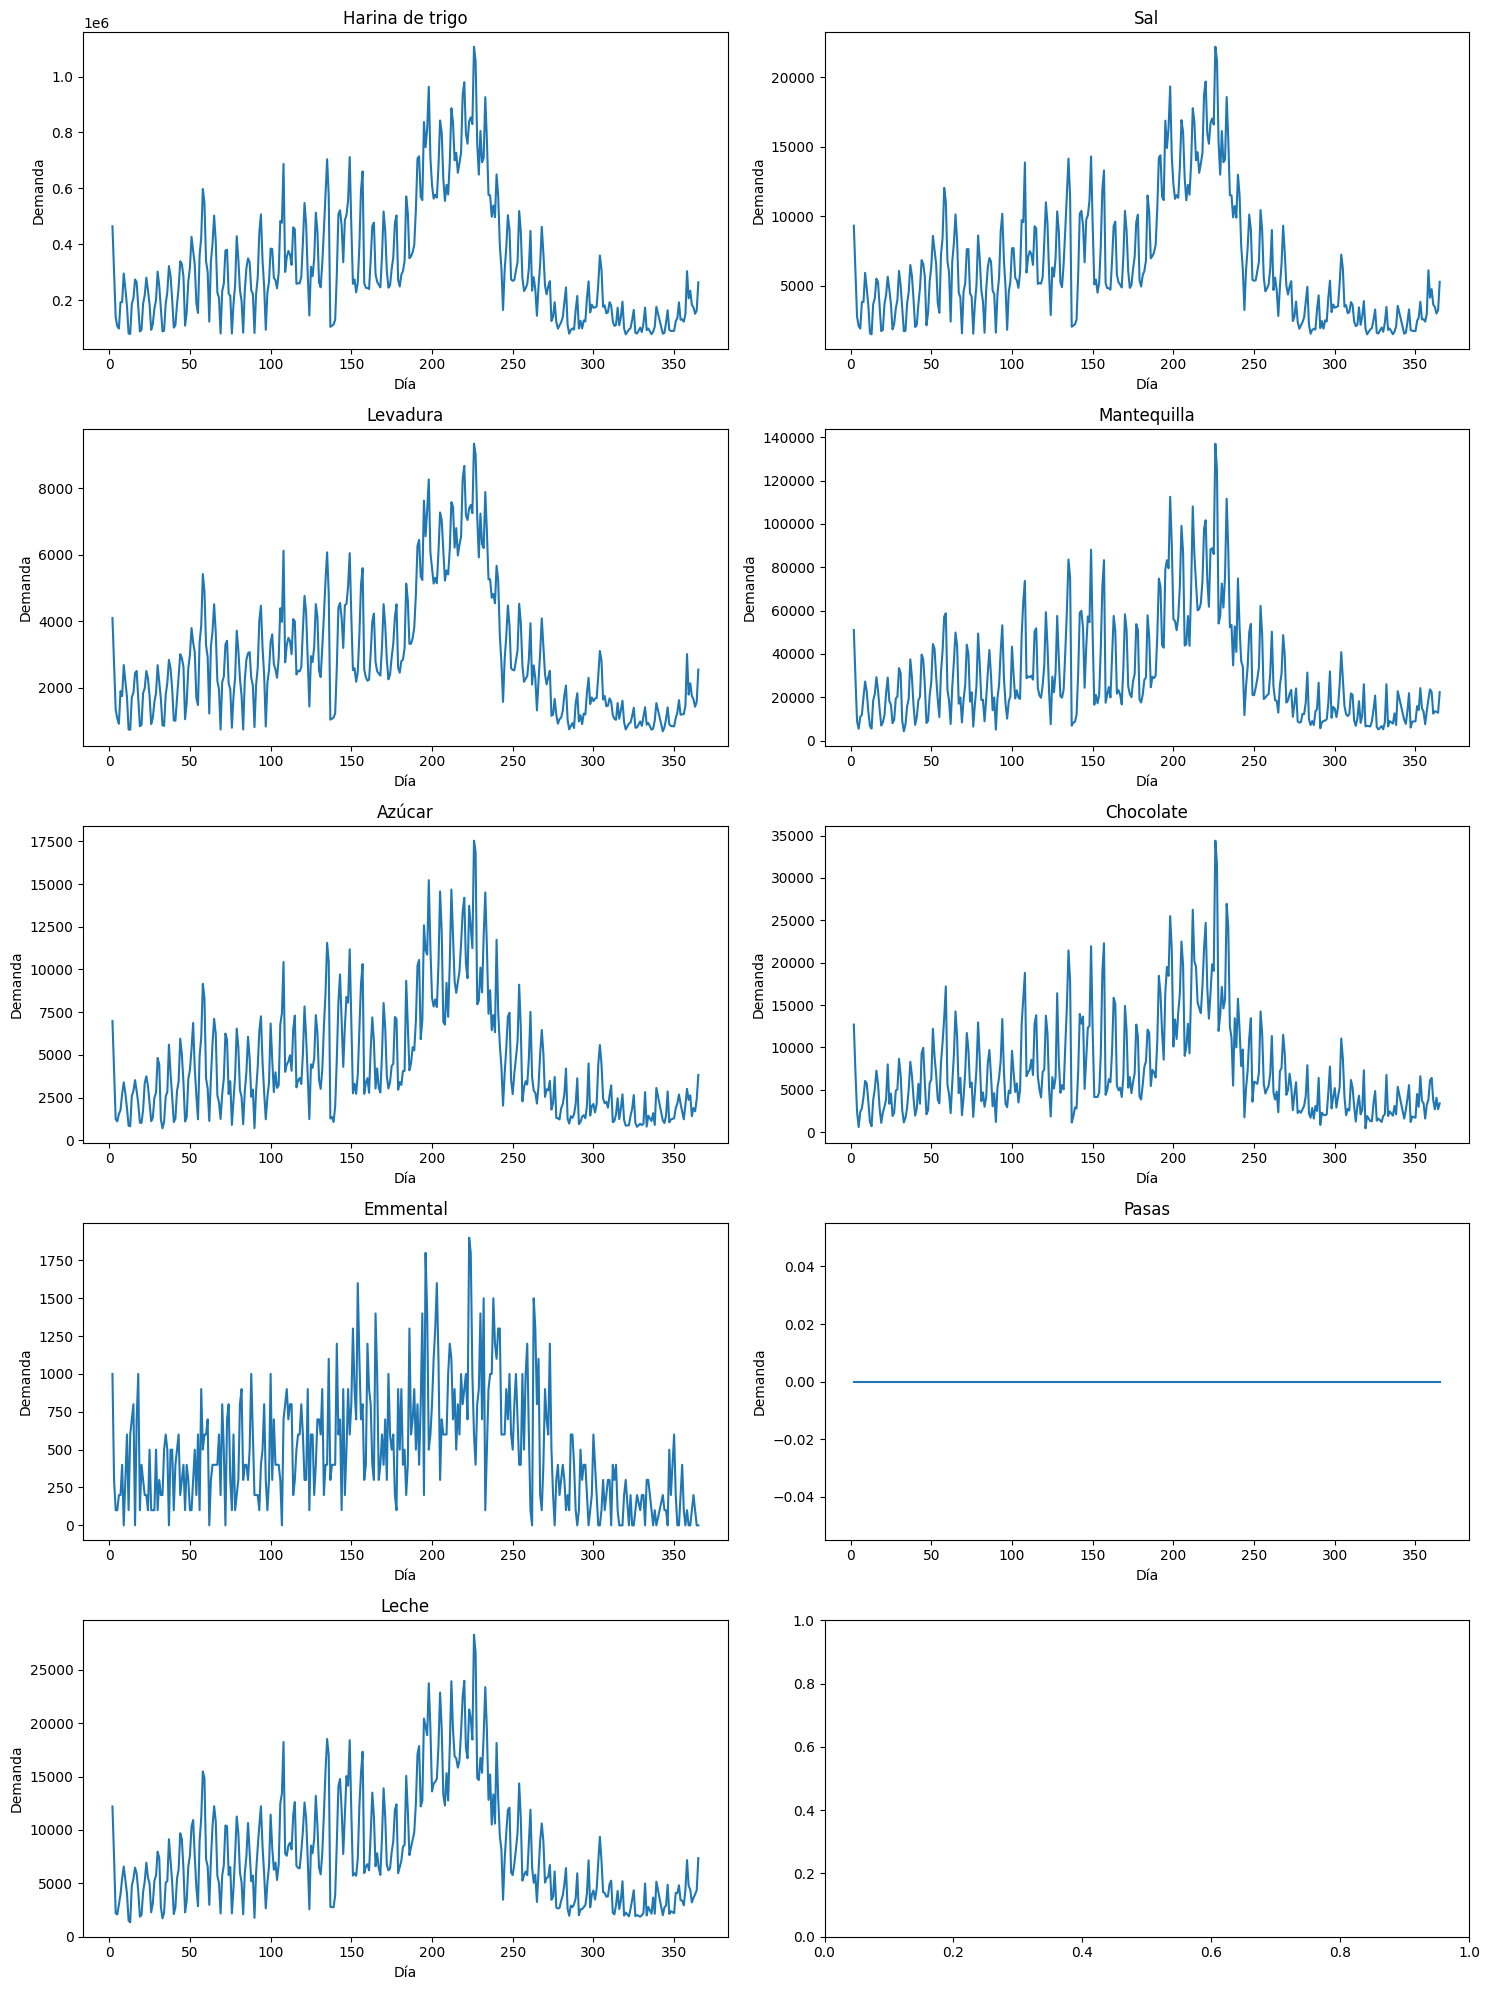

In [77]:
# Crear una figura con subplots, 2 por fila
fig, axs = plt.subplots(nrows=(len(df_ingredientes_dia) + 1) // 2, ncols=2, figsize=(15, 20))

# Iterar sobre cada ingrediente y graficar su demanda por día
for i, ingrediente in enumerate(df_ingredientes_dia.index):
	ax = axs[i // 2, i % 2]
	ax.plot(df_ingredientes_dia.columns, df_ingredientes_dia.loc[ingrediente])
	ax.set_title(ingrediente)
	ax.set_xlabel("Día")
	ax.set_ylabel("Demanda")

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()